In [141]:
## Import required packages
import pyfolio as pf
import yfinance as yf

In [131]:
## Stock in question, ticker needs to match Yahoo Finance
data = yf.Ticker('TEA.XA').history('max')
returns = data.Close.pct_change()

## Ticker to benchmark against
bench = yf.Ticker('SPY').history('max')
bench_returns = bench.Close.pct_change()

In [139]:
## Drop NA values, convert to UTC, align date range
returns = returns.dropna()
bench_returns = bench_returns.dropna()

## Convert to UTC, strip timezone
returns.index = returns.index.normalize()
bench_returns.index = bench_returns.index.normalize()
returns.index = returns.index.tz_localize(None)
bench_returns.index = bench_returns.index.tz_localize(None)

## Align
returns, bench_returns = returns.align(bench_returns, join='inner')

# Pyfolio will crash if it sees naive dates, so stamp them as UTC
returns.index = returns.index.tz_localize('UTC')
bench_returns.index = bench_returns.index.tz_localize('UTC')

/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '147.503%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.244%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.12,2025-01-07,2025-04-07,2025-06-17,116
1,20.87,2025-11-12,2026-01-09,NaT,NaN
2,13.72,2024-05-01,2024-06-17,2024-07-17,56
3,13.35,2024-11-19,2024-12-06,2025-01-07,36
4,10.43,2024-07-23,2024-08-13,2024-08-26,25


/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/morganlangley/python_portfolio_tracker/main/.venv/lib/python3.13/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/Users/morganla

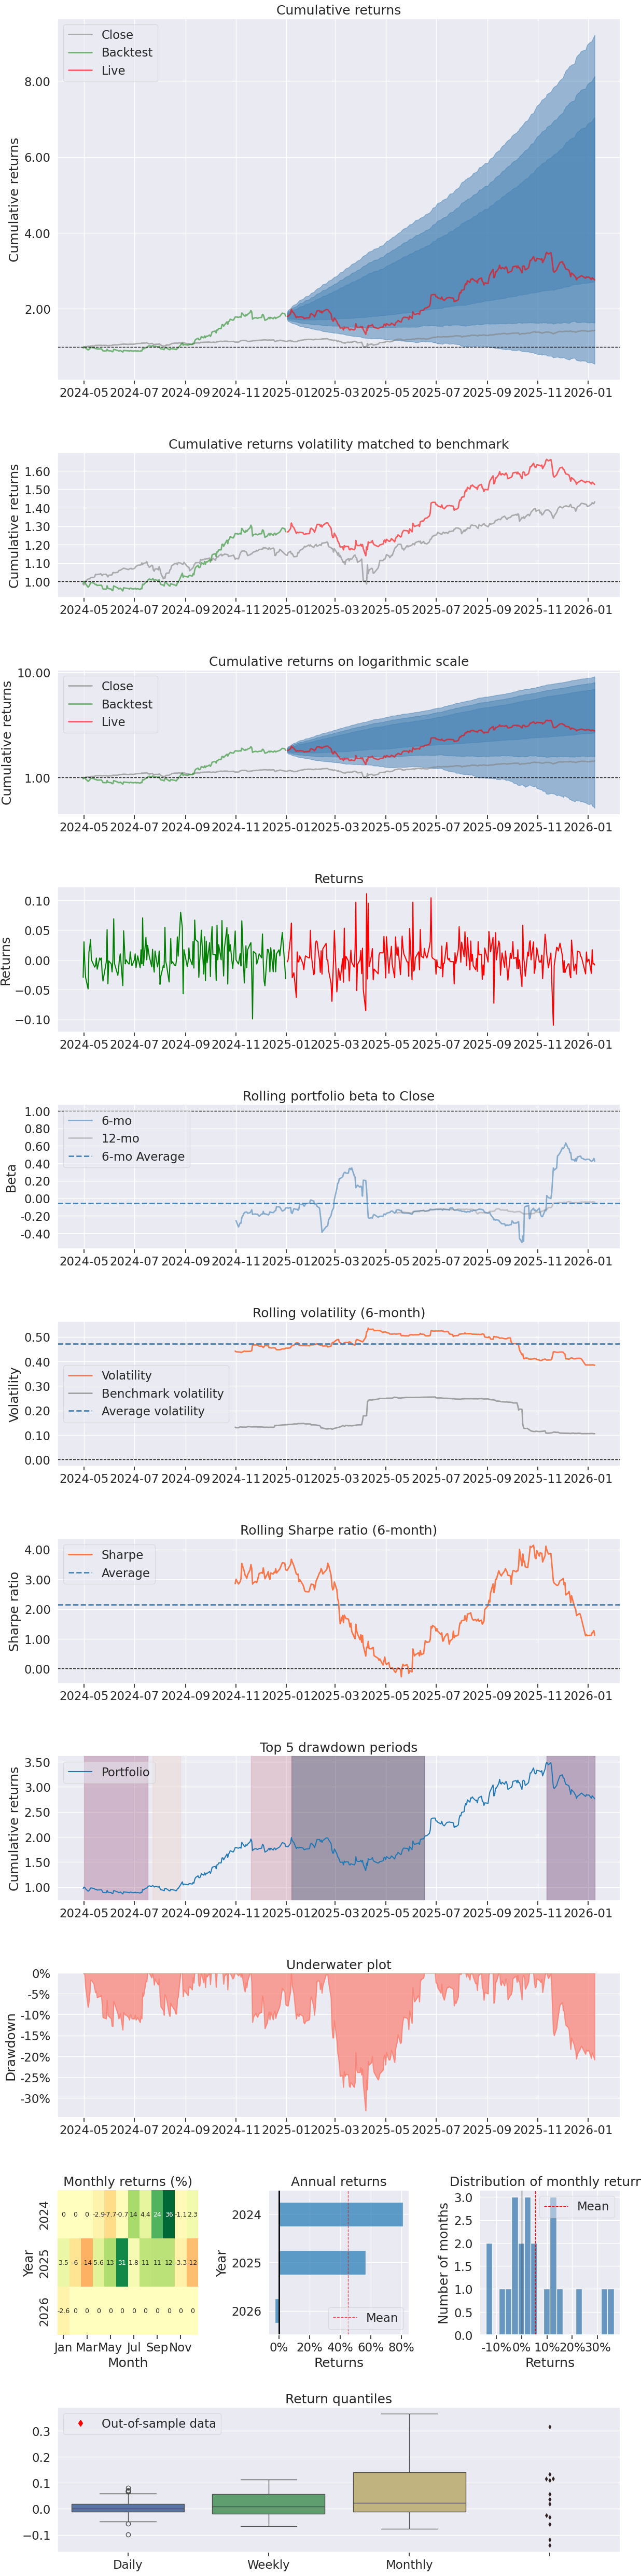

In [140]:
## Create returns tear sheet (set the date of purchase / interest)
pf.create_returns_tear_sheet(returns, live_start_date='2025-01-01', benchmark_rets=bench_returns)